In [2]:
from matplotlib import pyplot as plt 
import numpy as np  
%matplotlib inline
from tqdm import tqdm
from scipy.special import erf

In [3]:
import sys
sys.path.append('../lib')
from simlib import *

In [8]:
def gen_int(x, m, s):
    return erf((x-m)/(np.sqrt(2)*s))/2

def integral(x1, x2, m, s):
    if len(m) != len(s):
        raise ValueError('m and s must be of same size!')
    N = len(m)
    value = 1/N * np.sum([(gen_int(x2, m[i], s[i]) - gen_int(x1, m[i], s[i])) for i in range(N)])
    return value

In [9]:
method = 'lang'

In [33]:
m = [-6, 0, 10]
s = [1.5, 2, 1.5]
gs = [gaussian(mi, si) for mi, si in zip(m, s)]
U = gaussian_potential(gs)

In [51]:
num_particles = 1000
max_t = 1000.0
dt = 0.1
x0 = 0.0
beta = 0.5
steps = max_t/dt

In [52]:
ts, xs = simulate(method=method, potential=U, num_particles=num_particles, max_t=max_t, dt=dt, x0=x0)

100%|██████████| 9999/9999 [06:33<00:00, 25.39it/s]


In [53]:
num_bins = 300
bins = np.linspace(-15, 20, num_bins)

In [54]:
hist = np.zeros(shape=(num_particles, num_bins-1))
for i in range(num_particles):
    hist[i], _ = np.histogram(xs[:,i], bins)

In [55]:
mean_hist = np.mean(hist, axis=0)

In [56]:
expected = steps * np.array([integral(bins[i], bins[i+1], m, s) for i in range(num_bins-1)])

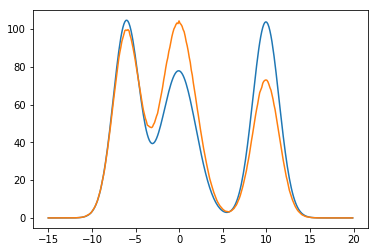

In [57]:
plt.plot(bins[:-1], expected)
plt.plot(bins[:-1], mean_hist)

In [58]:
err = np.sqrt(mean_hist)

In [59]:
match_array = [1 if h-er <= ex <= h+er else 0 for h, ex, er in zip(mean_hist, expected, err)]
match = np.sum(match_array) / num_bins
print('match = {}%'.format(match*100))

match = 48.66666666666667%
